### Downloading the data from kaggle api ✨

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#from google.colab import files
#files.upload()  # This will prompt you to upload the kaggle.json file from your computer


In [3]:
#import os
# Create the .kaggle directory if it doesn't exist
#os.makedirs('/root/.kaggle', exist_ok=True)
# Move the uploaded kaggle.json to the correct location
#os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


In [4]:
#os.chmod('/root/.kaggle/kaggle.json', 600)

In [5]:
#!kaggle competitions download -c dog-breed-identification

In [6]:
#!unzip "/content/dog-breed-identification.zip" -d "/content/drive/MyDrive/Colab Notebooks"

# ❤️ End to End Multi-class Dog Breed Classification
## Using Tensorflow 2.0 and TensorFlow Hub.

# Getting our workspace ready 💻

## Importing

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
print ("TF version:",tf.__version__)
print ("TF hub version:",hub.__version__)

TF version: 2.18.0
TF hub version: 0.16.1


In [8]:
# Check for GPU availability
print("GPU: ","available " if tf.config.list_physical_devices("GPU") else "not avalaible")

GPU:  available 


## Getting our data ready

In [9]:
# Checkout the labels
import pandas as pd
labels_csv=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [10]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [11]:
# How many images of each breed are there?
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

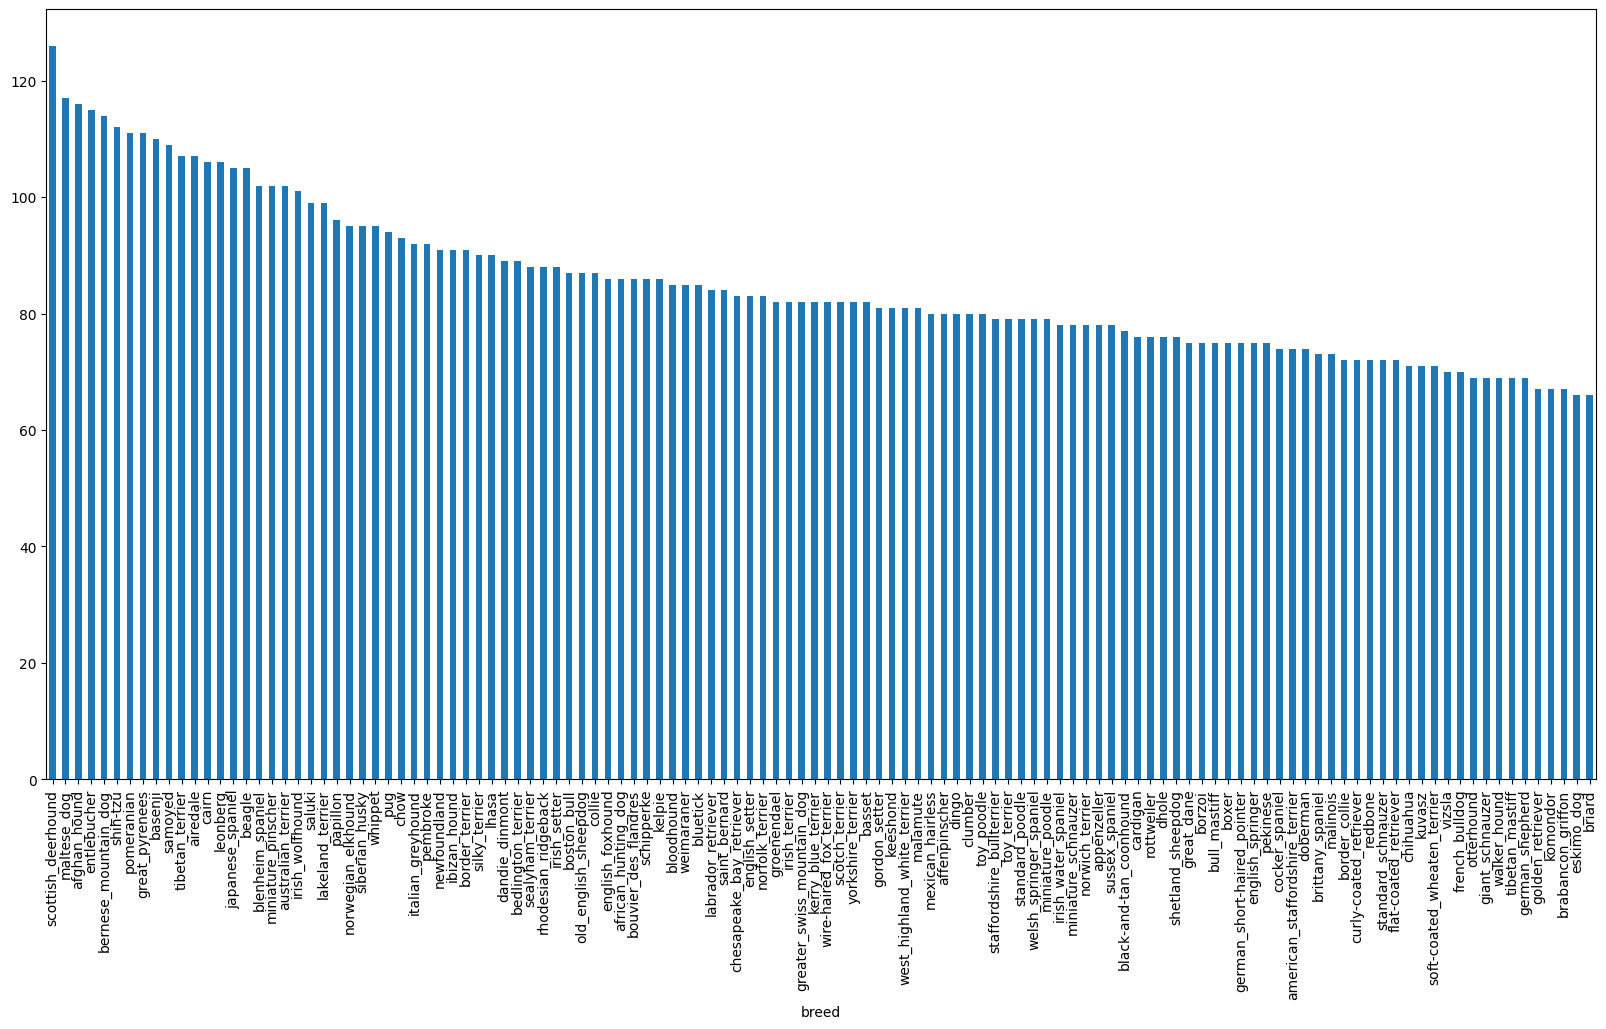

In [12]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [13]:
labels_csv["breed"].value_counts().median()

82.0

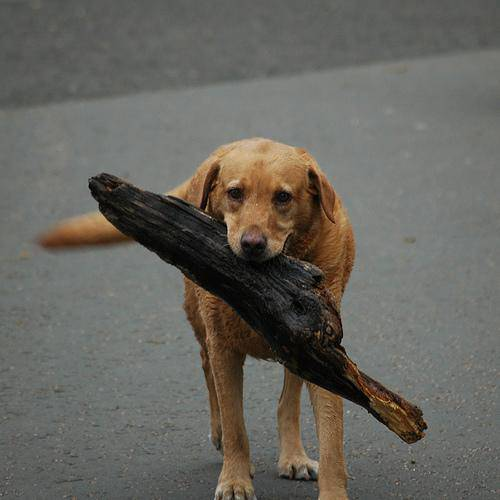

In [14]:
# Let's view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg")

In [15]:
filenames=["/content/drive/MyDrive/Colab Notebooks/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [16]:
import os
if len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Dog_vision/train"))==len(filenames):
  print("Filenames matches")
else:
  print("Filenames doesn't match")

Filenames matches


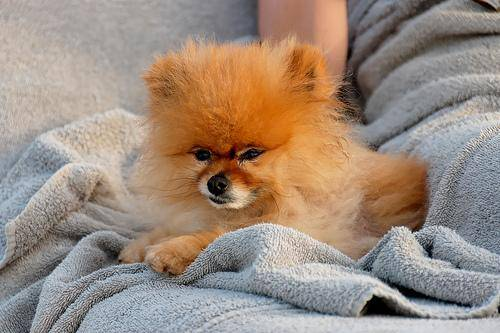

In [17]:
from IPython.display import Image

# Assuming your images are in '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/'
filenames = ["/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check if the file exists before trying to display it
if os.path.exists(filenames[8000]):
  display(Image(filenames[8000]))
else:
  print(f"Error: File not found: {filenames[8000]}")

In [18]:
# Preparing our labels

In [19]:
import numpy as np
labels=labels_csv["breed"]
np.array(labels)

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [20]:
len(labels)

10222

In [21]:
# unique label values
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [22]:
len(unique_breeds)

120

In [23]:
# Turning all the labels into boolean values
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
len(boolean_labels)

10222

In [25]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set

In [26]:
X=filenames
y=boolean_labels

## Setting the number of images as users wish

In [27]:
NUM_IMAGES=1000 #@param {type:"slider", min:1000, max:10000, step:100}

In [28]:
# Let us split our data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=0.2,
                                                random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [29]:
# Check out the training data (image file paths and labels)
X_train[:5], y_train[:2]

(['/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
     

## Preprocessing Images (turning images into Tensors)

In [30]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [31]:
#Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [9]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

## Turning our data into batches

10000+ data can't fit into memory hence we do 32 at a time batch size to process.

In order to use TensorFlow effectively, we need our data to be in the form of tensor tuples which look like: `(image, label)`.

In [10]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [34]:
# Example
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

## We have our tuples ready hence let's make batches.

In [5]:
BATCH_SIZE=32;

def create_data_batches (X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  #If the data is a test dataset, don't need to have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch


In [36]:
train_data=create_data_batches(X_train, y_train)
val_data=create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [37]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

In [38]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

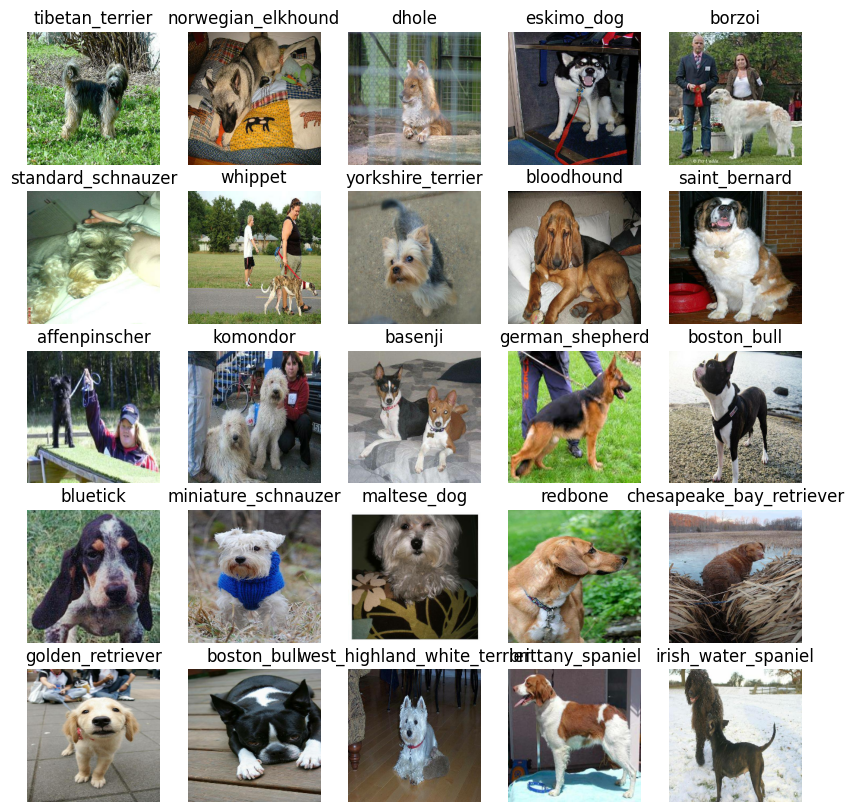

In [39]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

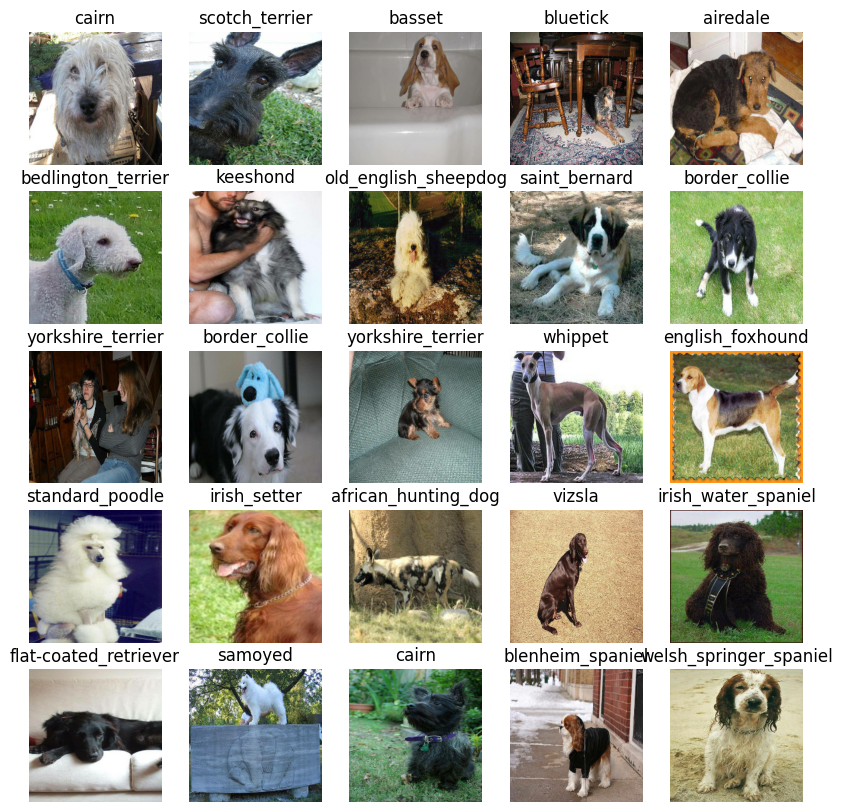

In [40]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Creating and training the model

In [41]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

In [42]:
len(unique_breeds)

120

# We will be using pre-built deep learning models and then building upon it, Listed below can be used

* pytorch hub
* TensorFlow hub
* model zoo
* papers with code

In [43]:
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

We will use [the Keras API](https://www.tensorflow.org/guide/keras/overview).

Using Keras model in sequential fashion.

In [44]:
#!pip install "tensorflow<2.11"
#!pip install --upgrade tensorflow-hub

In [45]:
#!pip install --upgrade tensorflow tensorflow-hub

In [46]:
import tensorflow as tf
import tensorflow_hub as hub

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
     print("Building model with:", MODEL_URL)

     # Setup the model layers
     model = tf.keras.Sequential([
       # Wrap the KerasLayer in a Lambda layer for compatibility
       tf.keras.layers.Lambda(lambda x: hub.KerasLayer(MODEL_URL)(x), input_shape=input_shape),
       tf.keras.layers.Dense(units=output_shape, activation="softmax")
     ])

     # Compile the model
     model.compile(
         loss=tf.keras.losses.CategoricalCrossentropy(),
         optimizer=tf.keras.optimizers.Adam(),
         metrics=["accuracy"]
     )
     return model

In [47]:
layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4", input_shape=(224, 224, 3))
print("TensorFlow Hub model loaded successfully.")


TensorFlow Hub model loaded successfully.


# Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its process, check its progress or stop training early if a model stops improving.

We will create two callbacks, one for TensorBoard which healps track our models progress and another for early stopping which prevents our model from training for too long.

## TensorBoard Callback

In [48]:
%load_ext tensorboard

In [49]:
import datetime

In [50]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Colab Notebooks/Dog_vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."

In [51]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [52]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [53]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


Let's create a simple function which trains a model. The function will:
* Create a model using `create_model()`.
* Setup a TensorBoard callback using `create_tensorboard_callback()` (we do this here so it creates a log directory of the current date and time).
* Call the `fit()` function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.

In [54]:
# Build a function to train and return a trained model
def train_model():
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])

  return model

In [55]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 537s 21s/step - accuracy: 0.0432 - loss: 5.1576 - val_accuracy: 0.2800 - val_loss: 3.3912
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - accuracy: 0.6668 - loss: 1.8339 - val_accuracy: 0.5200 - val_loss: 2.1502
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.9356 - loss: 0.6296 - val_accuracy: 0.6050 - val_loss: 1.6849
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.9888 - loss: 0.2643 - val_accuracy: 0.6300 - val_loss: 1.5044
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9964 - loss: 0.1486 - val_accuracy: 0.6550 - val_loss: 1.4434
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 1.0000 - loss: 0.1021 - val_accuracy: 0.6400 - val_loss: 1.3965
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 1.0000 - loss: 0.0796 - val_accuracy: 0.6400 - val_loss: 1.3746
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 1.0000 - loss: 0.0634 - val_acc

Our model is overfitting

## Evaluating with TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and viualize its contents.

In [56]:
#%tensorboard --logdir /content/drive/MyDrive/Colab Notebooks/Dog_vision/logs

## Making and evaluating predictions using a trained model

In [57]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [58]:
# Make predictions on the validation data
predictions=model.predict(val_data, verbose=1)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 777ms/step


array([[1.4433443e-03, 7.0406371e-05, 6.9394824e-04, ..., 3.1070868e-03,
        3.3219672e-05, 3.9810422e-03],
       [4.9470323e-03, 1.5708026e-03, 1.4274967e-02, ..., 2.8092968e-03,
        1.7636563e-03, 9.7136530e-05],
       [5.1664056e-06, 8.0126563e-05, 9.0708738e-05, ..., 1.9308210e-04,
        1.3880376e-06, 1.6660638e-03],
       ...,
       [8.5881095e-07, 5.3268373e-05, 8.4616186e-05, ..., 1.1747072e-05,
        4.4939232e-05, 4.1453255e-05],
       [2.8593089e-03, 1.6905814e-04, 1.2702277e-04, ..., 1.4858032e-04,
        3.3465613e-04, 1.9789454e-02],
       [9.5387414e-04, 2.8930980e-04, 6.4459280e-04, ..., 1.0796880e-02,
        8.4681489e-04, 3.2684760e-04]], dtype=float32)

In [59]:
predictions.shape

(200, 120)

In [60]:
len(y_val)

200

In [61]:
len(unique_breeds)

120

In [62]:
np.sum(predictions[0]) # value is 1 or close to 1 because we used softmax

1.0

In [63]:
# First prediction
index=0
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[index])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[index])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}") # the predicted label

[1.44334428e-03 7.04063714e-05 6.93948241e-04 2.80359469e-04
 1.33738690e-03 3.72180002e-05 8.33187550e-02 5.93400153e-04
 1.02612027e-03 1.17375294e-03 1.43859725e-04 1.03502418e-03
 1.10583816e-04 8.15257139e-04 1.65840218e-04 6.95779920e-04
 2.03801450e-04 2.02602401e-01 3.03181023e-05 1.36577262e-04
 9.50135849e-03 3.97719792e-04 3.90776622e-05 2.55611120e-03
 2.85627411e-05 1.03086408e-04 2.98780501e-02 8.40578359e-05
 1.55153553e-04 3.12299677e-03 9.10479139e-05 5.00949274e-04
 1.42181801e-04 1.79516035e-04 3.05173919e-04 3.61191072e-02
 2.96061517e-05 2.26882077e-03 3.12961376e-04 2.43940260e-04
 1.33744173e-03 2.05375291e-05 1.41233642e-04 4.04108828e-03
 9.36626457e-05 2.69243377e-04 4.42477831e-05 2.42192225e-04
 4.49989719e-04 2.91189004e-04 5.14344647e-05 6.42921004e-05
 4.30374494e-04 1.93834901e-04 7.03417099e-05 3.06079775e-04
 2.32265811e-04 4.48231399e-03 1.26601558e-03 6.94761798e-02
 8.98150902e-05 1.17983960e-04 2.13461439e-03 1.55934631e-05
 2.50797719e-04 1.040369

In [64]:
unique_breeds[67]

'labrador_retriever'

Having this information is great but it would be even better if we could compare a prediction to its true label and original image.

To help us, let's first build a little function to convert prediction probabilities into predicted labels.

**Note:** Prediction probabilities are also known as confidence levels.

In [65]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

### Now we have to unbatch the the dataset to make predictions on the validation images and then compare those predictions to the validation labels( truth values)

Since our validation data (`val_data`) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using [`unbatch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#unbatch)) and then turn it into an iterator using [`as_numpy_iterator()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#as_numpy_iterator).

Let's make a small function to do so.

In [66]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[28], val_labels[28]

(array([[[0.24316767, 0.3377928 , 0.27995887],
         [0.16587588, 0.24098092, 0.26234823],
         [0.24934553, 0.31972486, 0.36967114],
         ...,
         [0.93337715, 0.9372987 , 0.9176909 ],
         [0.93337715, 0.9294556 , 0.9137693 ],
         [0.93337715, 0.9294556 , 0.9137693 ]],
 
        [[0.32806814, 0.41979676, 0.34301102],
         [0.18279031, 0.26186067, 0.26075777],
         [0.19423619, 0.2612618 , 0.29048797],
         ...,
         [0.948617  , 0.9446954 , 0.92900914],
         [0.94501054, 0.941089  , 0.9254027 ],
         [0.94501054, 0.941089  , 0.9254027 ]],
 
        [[0.16237012, 0.2575195 , 0.15447327],
         [0.17022747, 0.25048834, 0.21081042],
         [0.17525885, 0.2482017 , 0.23866038],
         ...,
         [0.94892335, 0.93693984, 0.9239409 ],
         [0.9399423 , 0.93602073, 0.92033446],
         [0.9399423 , 0.93602073, 0.92033446]],
 
        ...,
 
        [[0.27523115, 0.347325  , 0.15013999],
         [0.11859614, 0.16676442, 0.08855

In [67]:
def plot_pred(prediction_probabilities, labels, images, n=28):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "purple"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

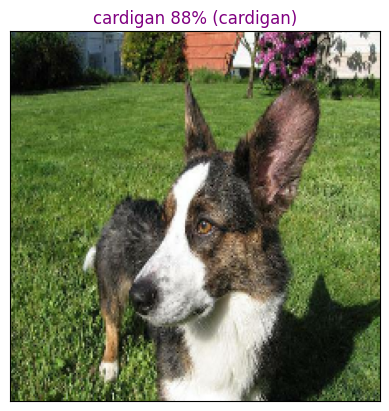

In [68]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

Nice! Making functions to help visual your models results are really helpful in understanding how your model is doing.

Since we're working with a multi-class problem (120 different dog breeds), it would also be good to see what other guesses our model is making. More specifically, if our model predicts a certain label with 24% probability, what else did it predict?

Let's build a function to demonstrate. The function will:
* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using `get_pred_label()`.
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.

In [69]:
def plot_pred_conf(prediction_probabilities, labels, n=28):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="purple")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

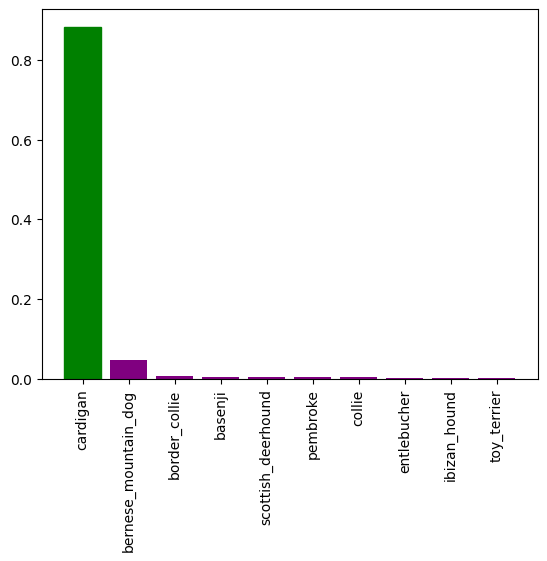

In [70]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=28)

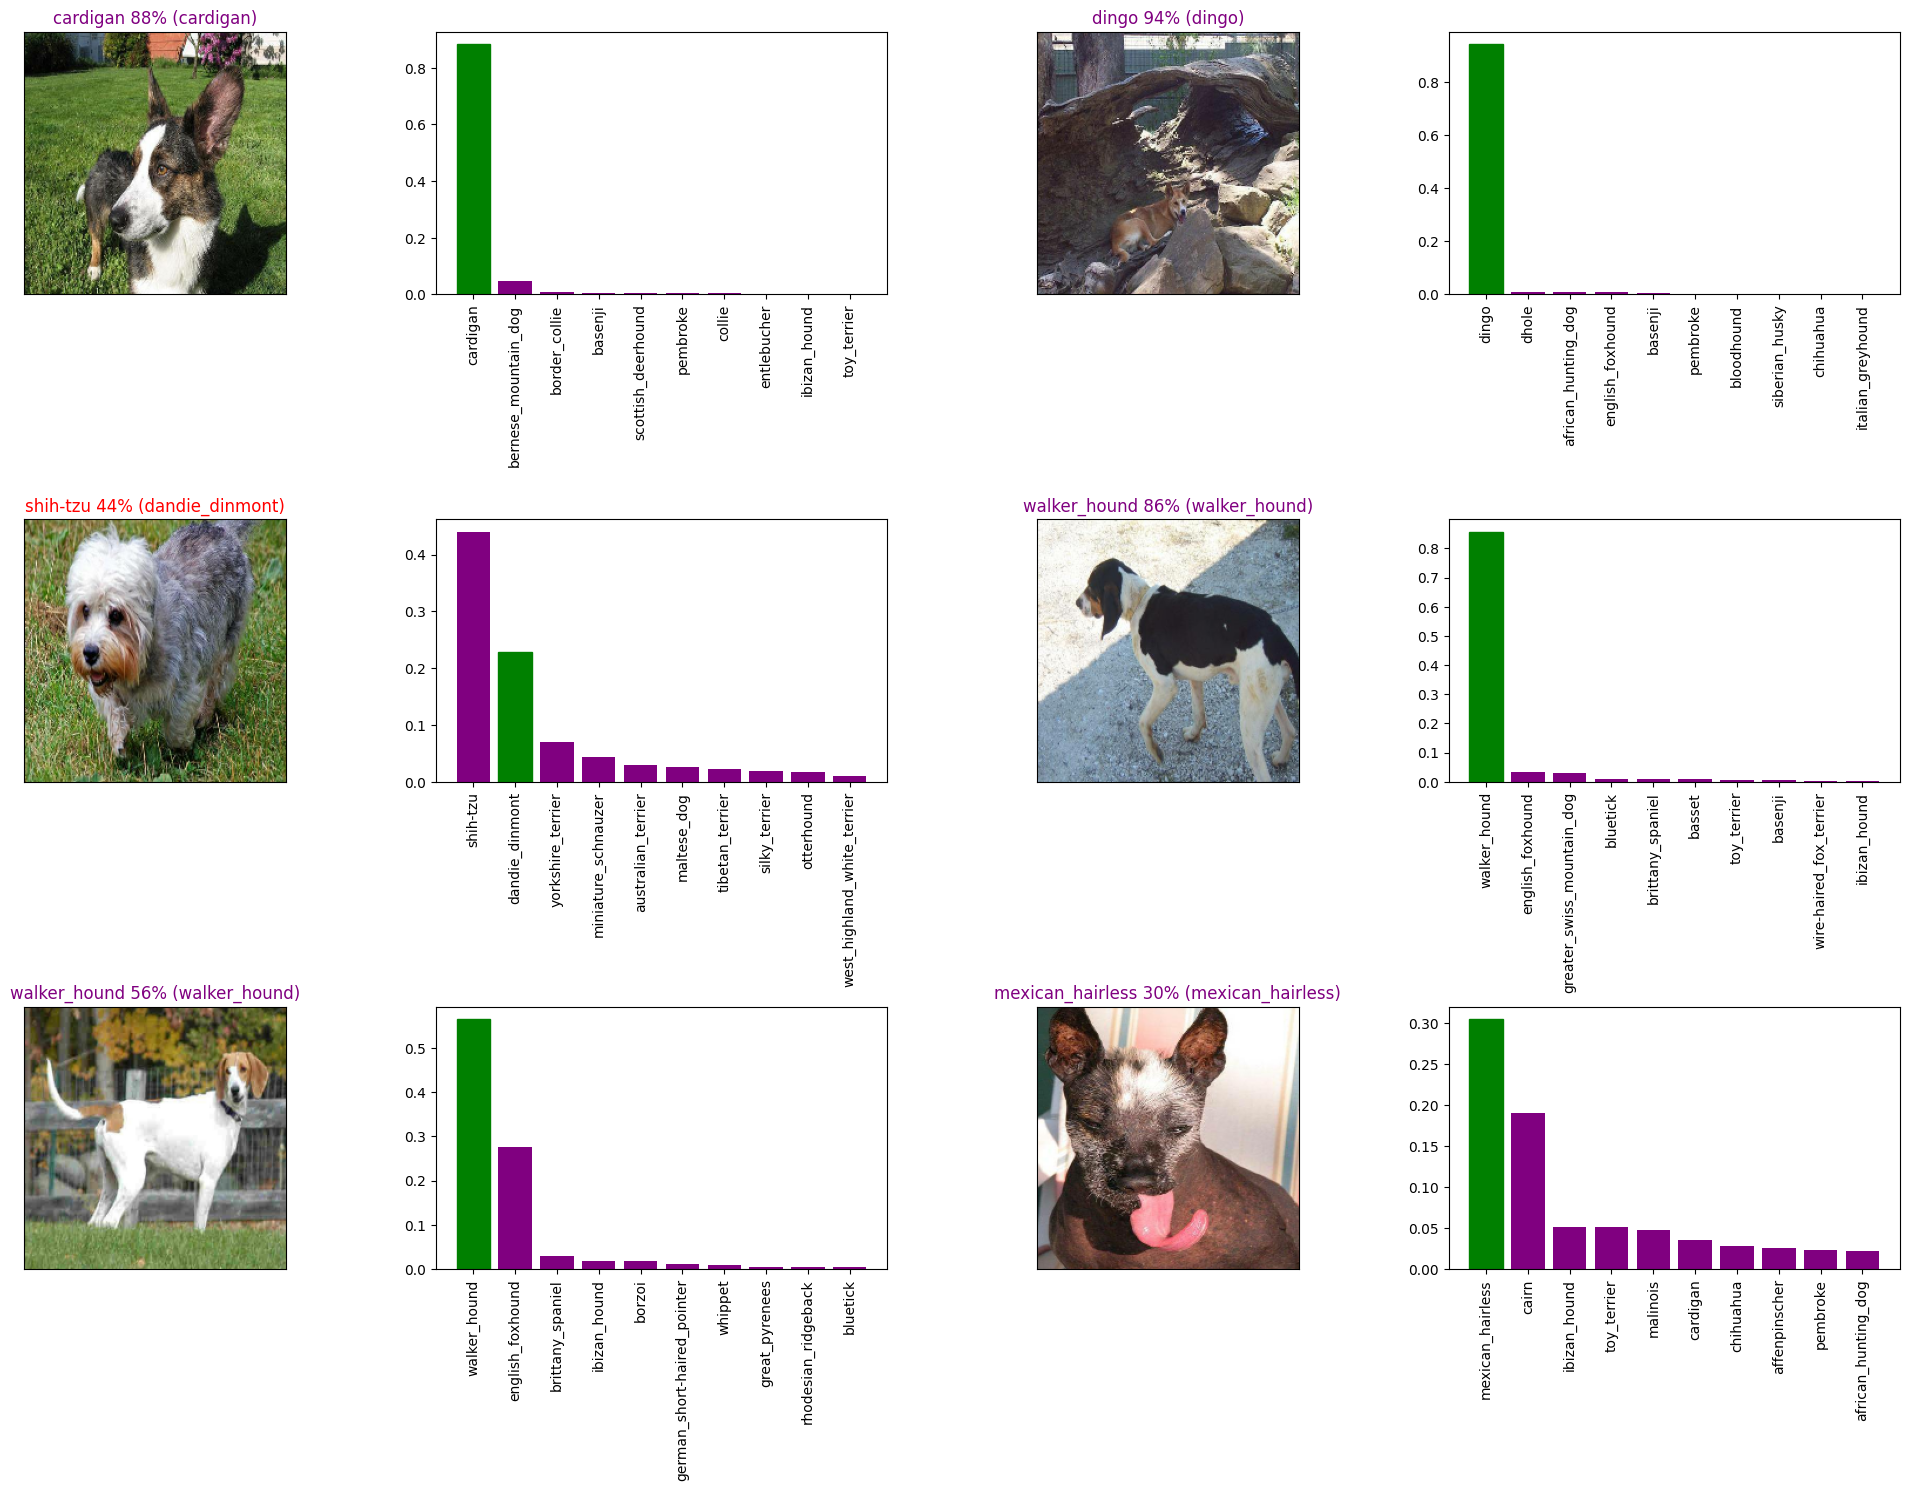

In [71]:
# Let's check a few predictions and their different values
i_multiplier = 28
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading our model

In [72]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/MyDrive/Colab Notebooks/Dog_vision/Models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [88]:
import tensorflow as tf
import tensorflow_hub as hub # Make sure to import tensorflow_hub here

def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  # Include 'KerasLayer' from tensorflow_hub in custom_objects
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={'KerasLayer': hub.KerasLayer})
  return model

In [74]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Dog_breed")

Saving model to: drive/MyDrive/Colab Notebooks/Dog_vision/Models/20250209-11041739099043-1000-images-Dog_breed.h5...


'drive/MyDrive/Colab Notebooks/Dog_vision/Models/20250209-11041739099043-1000-images-Dog_breed.h5'

In [75]:
# Load our model trained on 1000 images
model_1000_images = load_model('drive/MyDrive/Colab Notebooks/Dog_vision/Models/20250208-14341739025245-1000-images-Dog_breed.h5')

Loading saved model from: drive/MyDrive/Colab Notebooks/Dog_vision/Models/20250208-14341739025245-1000-images-Dog_breed.h5


# Training in the model on the whole dataset

In [76]:
len(X) , len(y)

(10222, 10222)

In [77]:
X[:10]

['/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog_vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [78]:
len(X_train)

800

In [79]:
#Create a data batch with the full dataset
full_data=create_data_batches(X,y)

Creating training data batches...


In [80]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [81]:
#Create a full model
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
#Create callbacks
full_model_tensorboard=create_tensorboard_callback()
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                           patience=3)

In [83]:
#Fit this model
full_model.fit(x=full_data,
              epochs=NUM_EPOCHS,
              callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 4689s 15s/step - accuracy: 0.4983 - loss: 2.2940
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 68s 125ms/step - accuracy: 0.8836 - loss: 0.4013
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - accuracy: 0.9408 - loss: 0.2280
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 42s 127ms/step - accuracy: 0.9667 - loss: 0.1447
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.9793 - loss: 0.1012
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 80s 126ms/step - accuracy: 0.9881 - loss: 0.0744
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 42s 127ms/step - accuracy: 0.9939 - loss: 0.0547
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 42s 132ms/step - accuracy: 0.9959 - loss: 0.0413
Epoch 9/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.9964 - loss: 0.0362
Epoch 10/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.9971 - loss: 0.0281
Epoch 11/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 39s 123ms/step - accuracy: 0.9984 - loss: 0.0235
Epoch 12

In [84]:
# Save model to file
save_model(full_model, suffix="all-images-Dog-Breed")

Saving model to: drive/MyDrive/Colab Notebooks/Dog_vision/Models/20250209-13011739106080-all-images-Dog-Breed.h5...


'drive/MyDrive/Colab Notebooks/Dog_vision/Models/20250209-13011739106080-all-images-Dog-Breed.h5'

In [2]:
import os
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "drive/MyDrive/Colab Notebooks/Dog_vision/test"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['drive/MyDrive/Colab Notebooks/Dog_vision/testdff4932a639f0bf9b1e693fff89fc898.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_vision/teste4ba350279796ff15c3a634037a6f88e.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_vision/teste05367db91d0449b2afe76a1b7acc1c8.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_vision/teste5e51d0dfc3ccdb74de51933b2671742.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_vision/testde15c21ba0a1f139d26223d5e2b09703.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_vision/teste138d8e5745db1213cc08131e7420c7a.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_vision/teste683ba5a138de0fbb7bb1523862b43f2.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_vision/teste30a97eb637239e3b15c903529e04800.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_vision/teste55d2fced9eb7e46aef5bdb288145fa4.jpg',
 'drive/MyDrive/Colab Notebooks/Dog_vision/testdfa54e85c1309d8a9933deedc1d775c7.jpg']

In [3]:
# How many test images are there?
len(test_filenames)

10357

In [11]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [12]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>